In [4]:
%matplotlib inline
import numpy as np
import os
from matplotlib import pyplot as plt
import glob
import matplotlib as mpl

mpl.rc('font',family='Times New Roman')
g = 9.805

In [5]:
#6 Storey
Vy = 1723.95  #kN
Dy = 0.0681 #m
Du = 0.6 #m
me = 523.05  #kNm/s^2

Say = Vy/(me*g)
Say

0.3361505772076572

In [6]:
Ty = 2*np.pi*(me*Dy/Vy)**0.5
Ty

0.9031558402862495

In [7]:
Tn = 0.7421

In [8]:
IMs  = [0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4]

In [9]:
T = np.loadtxt('C:/Users/rmeri/Documents/UCL/FRS/NLTH/GroundAccSpct/GMASpct1.txt')[:,0]

Sa = np.zeros((len(T),44))
Sd = np.zeros((len(T),44))

for i in range(44):
    Sa[:,i] = np.loadtxt('C:/Users/rmeri/Documents/UCL/FRS/NLTH/GroundAccSpct/GMASpct'+str(i+1)+'.txt')[:,1]
    Sd[:,i] = np.loadtxt('C:/Users/rmeri/Documents/UCL/FRS/NLTH/GroundDispSpct/GMDSpct'+str(i+1)+'.txt')[:,1]

In [10]:
SF = np.zeros((len(IMs),44))

for i in range(len(IMs)):
    for j in range(44):
        SF[i,j] = (IMs[i]*Say)/Sa[abs(T-Tn).argmin(),j]

In [11]:
Sam = np.zeros((len(T),len(IMs)))
Sdm = np.zeros((len(T),len(IMs)))

for i in range(len(IMs)):
    for j in range(len(T)):
        Sam[j,i] = np.median(Sa[j,:]*SF[i,:])
        Sdm[j,i] = np.median(Sd[j,:]*SF[i,:])
    
  

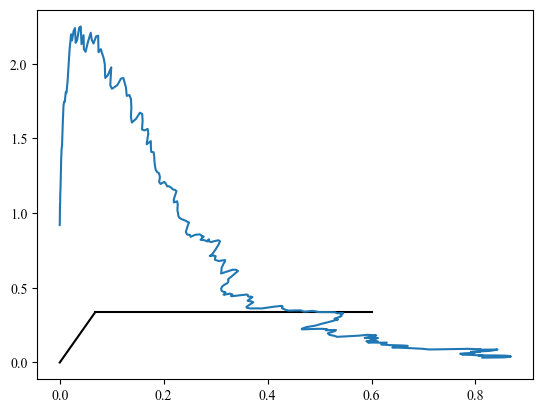

In [12]:
plt.plot((0,Dy),(0,Say),color='k')
plt.plot((Dy,Du),(Say,Say),color='k')
plt.plot(Sdm[:,9],Sam[:,9])
plt.show()

In [13]:
def CapacitySpectrum(Ty,Say,Dy,Du,Sa,Sd,T):
    ind = abs(Ty-T).argmin()
    s = 0
    if(Sd[ind]<=Dy):
        #elastic supporting structure
        d1 = Sd[ind]
        Sa1 = Sa[ind]
        return d1,Sa1,s
        
    tol = 0.007
    if(Sd[ind]>Dy):
        s=1
        for i in range(0,1001):
            d = Dy+(Du-Dy)*i/1001
            mu = d/Dy
            ksi = 0.05+0.565*(mu-1)/(mu*np.pi)
            eta = (0.07/(0.02+ksi))**0.5

            iny = abs(Dy-eta*Sd).argmin()
            ina = abs(Say-eta*Sa[iny:]).argmin()+iny
            Sdcr = eta*Sd[ina]

            if(abs(Sdcr-d)<=tol):
                d1 = d
                Sa1 = Say
                return d1,Sa1,s
                break

        if(i==1000):
            raise TypeError("No solution")

    

In [14]:
def CapacitySpectrum_MU(Ty,Say,Dy,Du,Sa,Sd,T):
    ind = abs(Ty-T).argmin()
    s = 0
    if(Sd[ind]<=Dy):
        #elastic supporting structure
        d1 = Sd[ind]
        Sa1 = Sa[ind]
        return 1
        
    tol = 0.006
    
    if(Sd[ind]>Dy):
        s=1
        for i in range(0,1001):
            d = Dy+(Du-Dy)*i/1001
            mu = d/Dy
            ksi = 0.05+0.565*(mu-1)/(mu*np.pi)
            eta = (0.07/(0.02+ksi))**0.5

            iny = abs(Dy-eta*Sd).argmin()
            ina = abs(Say-eta*Sa[iny:]).argmin()+iny
            Sdcr = eta*Sd[ina]

            if(abs(Sdcr-d)<=tol):
                d1 = d
                Sa1 = Say
                return d1/Dy
                break

    

In [15]:
def CapacitySpectrum_MU2(Ty,Say,Dy,Du,Sa,Sd,T):
    ind = abs(Ty-T).argmin()
    s = 0
    if(Sd[ind]<=Dy):
        #elastic supporting structure
        d1 = Sd[ind]
        Sa1 = Sa[ind]
        return d1/Dy
        
    tol = 0.006
    if(Sd[ind]>Dy):
        s=1
        for i in range(0,1001):
            d = Dy+(Du-Dy)*i/1001
            mu = d/Dy
            ksi = 0.05+0.565*(mu-1)/(mu*np.pi)
            eta = (0.07/(0.02+ksi))**0.5

            iny = abs(Dy-eta*Sd).argmin()
            ina = abs(Say-eta*Sa[iny:]).argmin()+iny
            Sdcr = eta*Sd[ina]

            if(abs(Sdcr-d)<=tol):
                d1 = d
                Sa1 = Say
            
                return d1/Dy
                break

In [16]:
def CapacitySpectrumNTC(Ty,Say,Dy,Du,Sa,Sd,T):
    ind = abs(Ty-T).argmin()
    s = 0
    if(Sd[ind]<=Dy):
        #elastic supporting structure
        ksi = 0.05
        d1 = Sd[ind]
        Sa1 = Sa[ind]
        return d1,Sa1,s,ksi
        
    tol = 0.003
    if(Sd[ind]>Dy):
        s=1
        for i in range(0,1001):
            d = Dy+(Du-Dy)*i/1001
            mu = d/Dy
            ksi = 0.05+0.565*(mu-1)/(mu*np.pi)
            eta = (0.07/(0.02+ksi))**0.5

            iny = abs(Dy-eta*Sd).argmin()
            ina = abs(Say-eta*Sa[iny:]).argmin()+iny
            Sdcr = eta*Sd[ina]

            if(abs(Sdcr-d)<=tol):
                d1 = d
                Sa1 = Say
                return d1,Sa1,s,ksi
                break

        if(i==1000):
            raise TypeError("No solution")

In [17]:
muB = np.zeros(10)

for i in range(len(muB)):
    muB[i] = CapacitySpectrum_MU(Ty,Say,Dy,Du,Sam[:,i],Sdm[:,i],T)

In [18]:
muB2 = np.zeros(10)

for i in range(len(muB)):
    muB2[i] = CapacitySpectrum_MU2(Ty,Say,Dy,Du,Sam[:,i],Sdm[:,i],T)

In [19]:
Rm = np.zeros(len(IMs))

for i in range(len(Rm)):
    Rm[i] = Sam[abs(Ty-T).argmin(),i]/Say
    

In [20]:
Rm

array([0.20326755, 0.40653511, 0.60980266, 0.81307021, 1.21960532,
       1.62614042, 2.03267553, 2.43921063, 2.84574574, 3.25228084])

In [21]:
def ReadFRS(im):
    col = np.loadtxt('C:/Users/rmeri/Documents/UCL/FRS/NLTH/Collapses/s1BS6storey/Collapses_IM'+str(im)+'.txt')
    nocol = []
    for i in range(len(col)):
        if(col[i]==0):
            nocol.append(i+1)
    
    nrec= len(nocol)
    
    nst = [1,3,6]
    SaF = np.zeros((len(T),nrec,len(nst))) 
    SdF = np.zeros((len(T),nrec,len(nst))) 
    for j in range(nrec):
        for k in range(len(nst)):
            SaF[:,j,k] = np.loadtxt('C:/Users/rmeri/Documents/UCL/FRS/NLTH/FloorSpct/s1BS6storey/Acceleration/FSA_IM'+str(im)+'_REC'+str(nocol[j])+'_'+str(nst[k])+'.txt')[:,1]
            SdF[:,j,k] = np.loadtxt('C:/Users/rmeri/Documents/UCL/FRS/NLTH/FloorSpct/s1BS6storey/Displacement/FSD_IM'+str(im)+'_REC'+str(nocol[j])+'_'+str(nst[k])+'.txt')[:,1]
            SaF[0,j,k] = 9.805*SaF[0,j,k]
    
    
    return SaF,SdF

In [22]:
SaF1,SdF1 = ReadFRS(1)
SaF2,SdF2 = ReadFRS(2)
SaF3,SdF3 = ReadFRS(3)
SaF4,SdF4 = ReadFRS(4)
SaF5,SdF5 = ReadFRS(5)
SaF6,SdF6 = ReadFRS(6)
SaF7,SdF7 = ReadFRS(7)
SaF8,SdF8 = ReadFRS(8)
SaF9,SdF9 = ReadFRS(9)
SaF10,SdF10 = ReadFRS(10)

In [23]:
def MedianFRS(SaF,SdF):

    SaFm = np.zeros((len(T),3))
    SdFm = np.zeros((len(T),3))

    for i in range(3):
        for j in range(len(T)):
            SaFm[j,i] = np.median(SaF[j,:,i])
            SdFm[j,i] = np.median(SdF[j,:,i])
            
    return SaFm,SdFm

In [24]:
SaF1m,SdF1m = MedianFRS(SaF1,SdF1)
SaF2m,SdF2m = MedianFRS(SaF2,SdF2)
SaF3m,SdF3m = MedianFRS(SaF3,SdF3)
SaF4m,SdF4m = MedianFRS(SaF4,SdF4)
SaF5m,SdF5m = MedianFRS(SaF5,SdF5)
SaF6m,SdF6m = MedianFRS(SaF6,SdF6)
SaF7m,SdF7m = MedianFRS(SaF7,SdF7)
SaF8m,SdF8m = MedianFRS(SaF8,SdF8)
SaF9m,SdF9m = MedianFRS(SaF9,SdF9)
SaF10m,SdF10m = MedianFRS(SaF10,SdF10)

In [25]:
params = np.array([0.12300526, 0.68524357, 1.18271876])

In [26]:
def errorPO(mu):
    return 0.22*np.exp(-abs(np.exp(0.44*(mu-1.04))-np.exp(-(mu-1.04))))

In [27]:
def errorPO2(mu):
    if(mu<0.7):
        return 0.07/0.7*mu
    elif(mu>=0.7 and mu <1):
        return 0.07+(mu-0.7)*(0.25-0.07)/(1-0.7)
    elif(mu>=1 and mu<2):
        return 0.25-(0.25-0.035)/(2-1)*(mu-1)
    else:
        return 0.035

In [28]:
def FRS_Mer(T,Say,Dy,Du,Sam,Sdm,ksiS,ksiNS,Ge,ns):
    
    Ty = 2*np.pi*(Dy/(Say*g))**0.5
    Tn = np.zeros(4)
    Tn[0] = 0.84*Ty
    Tn[1] = 0.84*Ty/4
    Tn[2] = 0.84*Ty/7
    Tn[3] = 0.84*Ty/9
    
    TB = 0.2
    TC = 0.6
    PGD = Sdm[-1]
    TD = 6
    SdTD =max(Sdm)
    SaTD = SdTD/g*(4*np.pi**2)/TD**2
    
    d1,Sa1,s = CapacitySpectrum(Ty,Say,Dy,Du,Sam,Sdm,T)
    
    if(d1<Dy):
        mu = 1
        mu1 = d1/Dy
    else:
        mu = d1/Dy
        mu1 = d1/Dy
    
    Sa2 = Sam[abs(T-(0.84*Ty/4)).argmin()]
    Sd2 = Sdm[abs(T-(0.84*Ty/4)).argmin()]
    
    Sa3 = Sam[abs(T-(0.84*Ty/7)).argmin()]
    Sd3 = Sdm[abs(T-(0.84*Ty/7)).argmin()]
    
    Sa4 = Sam[abs(T-(0.84*Ty/9)).argmin()]
    Sd4 = Sdm[abs(T-(0.84*Ty/9)).argmin()]
    
    a = np.zeros(len(Tn))
    
    er = (1-errorPO2(mu1))
   
    
    a[0] = Ge*(4/3)*(ns/6)*(1-0.25*(ns/6))*Sa1*er
    a[1] = 0.426*abs(np.sin(4.71*(ns/6)))*Sa2
    a[2] = 0.254*abs(np.sin(7.85*(ns/6)))*Sa3
    a[3] = 0.202*abs(np.sin(10.99*(ns/6)))*Sa4
    
    d = np.zeros(len(Tn))
    
    d[0] = Ge*0.75*(ns/4)*(1-0.25*(ns/6))*d1
    d[1] = 0.426*abs(np.sin(4.71*(ns/6)))*Sd2
    d[2] = 0.254*abs(np.sin(7.85*(ns/6)))*Sd3
    d[3] = 0.202*abs(np.sin(10.99*(ns/6)))*Sd4

    Te = np.zeros(4)
    if(s==0):
        Te[0] = 0.84*Ty
        Te[1] = 0.84*Ty/3
        Te[2] = 0.84*Ty/5
        Te[3] = 0.84*Ty/7
    elif(s==1):
        Te[0] = 0.84*Ty*((1+(mu)**0.5+mu)/3)**0.5
        Te[1] = (0.84*Ty/3)*((1+(mu)**0.5+mu)/3)**0.5
        Te[2] = 0.84*Ty/5
        Te[3] = 0.84*Ty/7
        
    DAF = np.zeros(len(Tn))
    for i in range(len(Tn)):     
         #if(Tn[i]>TB):
            #DAF[i] = (ksiNS)**(-0.5)
        #else:
            #DAF[i] = (ksiNS)**(-0.5)*(0.55+0.45*(Tn[i]/TB))
        if(Tn[i]/TC == 0):
            DAF[i] = 2.5*(0.1/(0.05+ksiNS))**0.5;
        elif(Tn[i]/TC > 0 and Tn[i]/TC <=0.2):
            DAF[i] = 2.5*(0.1/(0.05+ksiNS))**0.5 + (1/(ksiNS)**0.5 - 2.5*(0.1/(0.05+ksiNS))**0.5)/0.2*(Tn[i]/TC);
        else:
            DAF[i] = 1/(ksiNS)**0.5;
            
    SAF = np.zeros(len(Tn))
    SDF = np.zeros(len(Tn))
    
    SAF[0] = a[0]*DAF[0]
    SDF[0] = SAF[0]*g*(Te[0]/(2*np.pi))**2
    
    SAF[1] = a[1]*DAF[1]/(mu)**0.6
    SDF[1] = SAF[1]*g*(Te[1]/(2*np.pi))**2
    
    
    SAF[2] = a[2]*DAF[2]/(mu)**0.4
    SDF[2] = SAF[2]*g*(Te[2]/(2*np.pi))**2
    
    SAF[3] = a[3]*DAF[3]/(mu)**0.0
    SDF[3] = SAF[3]*g*(Te[3]/(2*np.pi))**2
    
    dabs = np.zeros(len(Tn))  
    if(SDF[0]>SdTD):
        dabs[0] = (d[0]**2+PGD**2)**0.5
    else:
        dabs[0] = d[0]
        
    for i in range(1,len(Tn)):
        dabs[i] = d[i]

    #Compute modal contributions to floor spectrum
    Safm = np.zeros((len(T),len(Tn)));
    Sdfm = np.zeros((len(T),len(Tn)));

    for j in range (len(Tn)):
        for i in range(len(T)):
            if(T[i]<=Tn[j]):
                Safm[i,j] = (T[i]/Tn[j])**2*(SAF[j]-a[j])+a[j]
                Sdfm[i,j] = Safm[i,j]*g*(T[i]**2/(4*np.pi**2)) 
            elif(T[i]>Tn[j] and T[i]<=Te[j]):
                Safm[i,j] = SAF[j]
                Sdfm[i,j] = Safm[i,j]*g*(T[i]**2)/(4*np.pi**2)
            elif(T[i]>Te[j]):
                if(mu>1 and j==0 and SDF[j]<SdTD):
                    if(T[i]<TD):  
                        Sdfm[i,j] = SDF[j]+(SdTD-SDF[j])/(TD-Te[j])*(T[i]-Te[j])
                        Safm[i,j] = Sdfm[i,j]*((4*np.pi**2)/T[i]**2)/g 
                    else:
                        Sdfm[i,j] = SdTD
                        Safm[i,j] = Sdfm[i,j]*((4*np.pi**2)/T[i]**2)/g 
                else:
                    Sdfm[i,j] = dabs[j] + (Te[j]/T[i])**2*(SDF[j]-dabs[j])
                    Safm[i,j] = Sdfm[i,j]*((4*np.pi**2)/T[i]**2)/g 
       
             
    #Combine modal contributions to floor response spectrum
    
    Saf = np.sqrt(np.sum(np.multiply(Safm,Safm),axis=1))
    Sdf = np.sqrt(np.sum(np.multiply(Sdfm,Sdfm),axis=1))

    nslim = round(6/2);
        
    if ns<nslim:
        for i in range(len(T)):
            Saf[i]=max(Saf[i],Sam[i]*(0.07/(0.02+ksiNS))**0.5);
            Sdf[i]=max(Sdf[i],Sdm[i]*(0.07/(0.02+ksiNS))**0.5);
    
    for i in range(len(T)):
        if(T[i]>Te[0]):
            Saf[i]=max(Saf[i],Sam[i]*(0.07/(0.02+ksiNS))**0.5);
            Sdf[i]=max(Sdf[i],Sdm[i]*(0.07/(0.02+ksiNS))**0.5);
    
    
    return Saf, Sdf

In [29]:
def EstFRS(T,Say,Dy,Du,Sam,Sdm,ksiS,ksiNS,Ge):
    
    nst = [1,3,6]
    Saf = np.zeros((len(T),3))
    Sdf = np.zeros((len(T),3))
    
    for i in range(3):
        Saf[:,i],Sdf[:,i] = FRS_Mer(T,Say,Dy,Du,Sam,Sdm,ksiS,ksiNS,Ge,nst[i])
        
    return Saf,Sdf

In [30]:
Saf1,Sdf1 = EstFRS(T,Say,Dy,Du,Sam[:,0],Sdm[:,0],0.05,0.05,1.33)
Saf2,Sdf2 = EstFRS(T,Say,Dy,Du,Sam[:,1],Sdm[:,1],0.05,0.05,1.33)
Saf3,Sdf3 = EstFRS(T,Say,Dy,Du,Sam[:,2],Sdm[:,2],0.05,0.05,1.33)
Saf4,Sdf4 = EstFRS(T,Say,Dy,Du,Sam[:,3],Sdm[:,3],0.05,0.05,1.33)
Saf5,Sdf5 = EstFRS(T,Say,Dy,Du,Sam[:,4],Sdm[:,4],0.05,0.05,1.33)
Saf6,Sdf6 = EstFRS(T,Say,Dy,Du,Sam[:,5],Sdm[:,5],0.05,0.05,1.33)
Saf7,Sdf7 = EstFRS(T,Say,Dy,Du,Sam[:,6],Sdm[:,6],0.05,0.05,1.33)
Saf8,Sdf8 = EstFRS(T,Say,Dy,Du,Sam[:,7],Sdm[:,7],0.05,0.05,1.33)
Saf9,Sdf9 = EstFRS(T,Say,Dy,Du,Sam[:,8],Sdm[:,8],0.05,0.05,1.33)
Saf10,Sdf10 = EstFRS(T,Say,Dy,Du,Sam[:,9],Sdm[:,9],0.05,0.05,1.33)

In [31]:
with open('EstFRS6IM1.txt','w') as f1:
    for i in range(len(T)):
        f1.write(str(T[i])+'  '+str(Saf1[i,0])+'  '+str(Sdf1[i,0])+'  '+str(Saf1[i,1])+'  '+str(Sdf1[i,1])+'  '+str(Saf1[i,2])+'  '+str(Sdf1[i,2])+'\n')

In [32]:
with open('EstFRS6IM4.txt','w') as f1:
    for i in range(len(T)):
        f1.write(str(T[i])+'  '+str(Saf4[i,0])+'  '+str(Sdf4[i,0])+'  '+str(Saf4[i,1])+'  '+str(Sdf4[i,1])+'  '+str(Saf4[i,2])+'  '+str(Sdf4[i,2])+'\n')

In [33]:
with open('EstFRS6IM10.txt','w') as f1:
    for i in range(len(T)):
        f1.write(str(T[i])+'  '+str(Saf10[i,0])+'  '+str(Sdf10[i,0])+'  '+str(Saf10[i,1])+'  '+str(Sdf10[i,1])+'  '+str(Saf10[i,2])+'  '+str(Sdf10[i,2])+'\n')

In [102]:
def NTC2(T,Say,Dy,Du,Sam,Sdm,ns,n):

    Ty = 2*np.pi*(Dy/(Say*g))**0.5

    d1,Sa1,s,ksie = CapacitySpectrumNTC(Ty,Say,Dy,Du,Sam,Sdm,T)
    
    if(s==1):
        Te = Ty*(1+(d1/Dy)**0.5)/2
    else:
        Te = Ty
    iTe = abs(Te-T).argmin()
    eta = (0.07/(0.02+ksie))**0.5
    San = Sam[iTe]*eta
    
    psi= np.zeros(ns)
    for i in range(ns):
        psi[i] = (1/ns)*(i+1)
    gamma = (3*ns)/(2*ns+1)

    acc = abs(San*gamma*psi[n-1]*(1+0.0004*ksie**2)**0.5)

    if(s==1):
        Tlow = Ty*min(1,0.4*(1+(d1/Dy)**0.5))
        Tup = Ty*0.55*(1+(d1/Dy)**0.5)
    else:
        Tlow = Ty*0.8
        Tup = Ty*1.1

    Saf = np.zeros(len(T))
    Sdf = np.zeros(len(T))

    for i in range(len(T)):
        if(T[i]<=Tlow):
            Saf[i] = (1.1*(ksie**-0.5)*acc)/(1+((1.1*(ksie**-0.5) - 1)*(1-(T[i]/(Tlow)))**1.6))
            Sdf[i] = Saf[i]*g*(T[i]**2/(4*np.pi**2)) 
        elif(T[i]>Tlow and T[i]<=Tup):
            Saf[i] = (1.1*ksie**-0.5*acc)
            Sdf[i] = Saf[i]*g*(T[i]**2/(4*np.pi**2))
        elif(T[i]>Tup):
            Saf[i] = (1.1*ksie**-0.5*acc)/(1+(1.1*ksie**-0.5 - 1)*((T[i]/(Tup))-1)**1.2)
            Sdf[i] = Saf[i]*g*(T[i]**2/(4*np.pi**2))

    return Saf,Sdf 

In [103]:
def EstFRSNTC(T,Say,Dy,Du,Sam,Sdm):
    
    Saf = np.zeros((len(T),3))
    Sdf = np.zeros((len(T),3))
    nst = [1,3,6]
    for i in range(len(nst)):
        Saf[:,i],Sdf[:,i] = NTC2(T,Say,Dy,Du,Sam,Sdm,6,nst[i])
        
    return Saf,Sdf

In [104]:
Saf1n,Sdf1n = EstFRSNTC(T,Say,Dy,Du,Sam[:,0],Sdm[:,0])
Saf2n,Sdf2n = EstFRSNTC(T,Say,Dy,Du,Sam[:,1],Sdm[:,1])
Saf3n,Sdf3n = EstFRSNTC(T,Say,Dy,Du,Sam[:,2],Sdm[:,2])
Saf4n,Sdf4n = EstFRSNTC(T,Say,Dy,Du,Sam[:,3],Sdm[:,3])
Saf5n,Sdf5n = EstFRSNTC(T,Say,Dy,Du,Sam[:,4],Sdm[:,4])
Saf6n,Sdf6n = EstFRSNTC(T,Say,Dy,Du,Sam[:,5],Sdm[:,5])
Saf7n,Sdf7n = EstFRSNTC(T,Say,Dy,Du,Sam[:,6],Sdm[:,6])
Saf8n,Sdf8n = EstFRSNTC(T,Say,Dy,Du,Sam[:,7],Sdm[:,7])
Saf9n,Sdf9n = EstFRSNTC(T,Say,Dy,Du,Sam[:,8],Sdm[:,8])
Saf10n,Sdf10n = EstFRSNTC(T,Say,Dy,Du,Sam[:,9],Sdm[:,9])

In [105]:
def PlotFRS(Saf,Sdf,SaFm,SdFm,ns,SaNT,SdNT):
    plt.figure(figsize=(20,4))

    plt.subplot(1,3,1)
    plt.plot(T,Saf[:,ns-1],label='Estimate')
    plt.plot(T,SaFm[:,ns-1],label='Median from NLTHA')
    plt.plot(T,SaNT[:,ns-1],label='NTC')
    plt.xlim(0,2)
    plt.ylim(0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(r'$T_a$  (s)',fontsize=16)
    plt.ylabel(r'$S_{AF}$  (g)',fontsize=16)
    plt.legend(fontsize=12)


    plt.subplot(1,3,2)
    plt.plot(T,Sdf[:,ns-1],label='Estimate')
    plt.plot(T,SdFm[:,ns-1],label='Median from NLTHA')
    plt.plot(T,SdNT[:,ns-1],label='NTC')
    plt.xlim(0,5)
    plt.ylim(0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(r'$T_a$  (s)',fontsize=16)
    plt.ylabel(r'$S_{DF}$  (m)',fontsize=16)
    plt.legend(fontsize=12)


    plt.subplot(1,3,3)
    plt.plot(Sdf[:,ns-1],Saf[:,ns-1],label='Estimate')
    plt.plot(SdFm[:,ns-1],SaFm[:,ns-1],label='Median from NLTHA')
    plt.plot(SdNT[:,ns-1],SaNT[:,ns-1],label='NTC')
    plt.xlim(0)
    plt.ylim(0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(r'$S_{DF}$  (m)',fontsize=16)
    plt.ylabel(r'$S_{AF}$  (g)',fontsize=16)
    plt.legend(fontsize=12)
    plt.show()



In [106]:
ns = 3

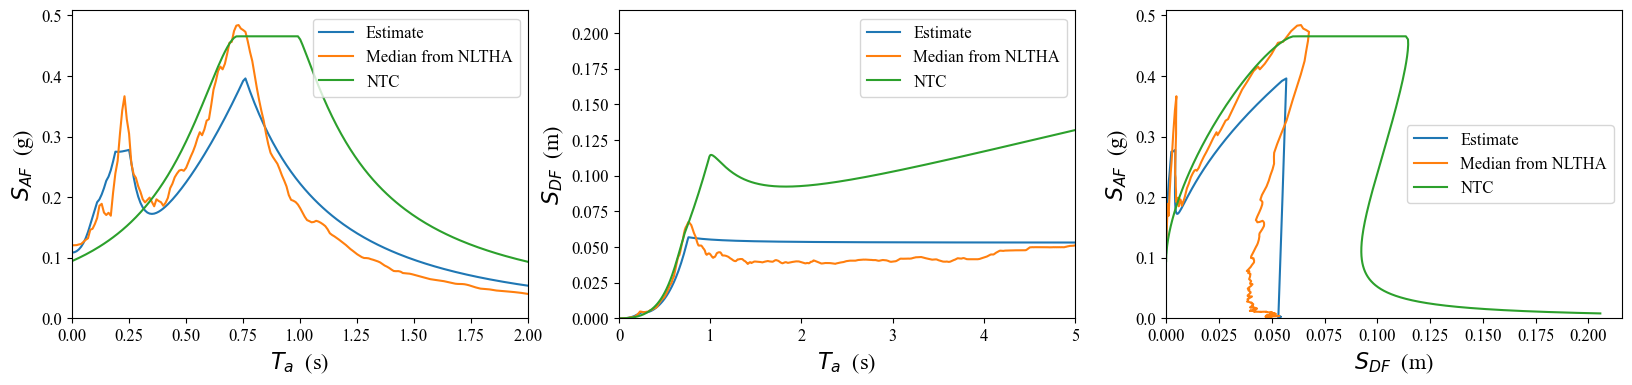

In [107]:
PlotFRS(Saf1,Sdf1,SaF1m,SdF1m,ns,Saf1n,Sdf1n)


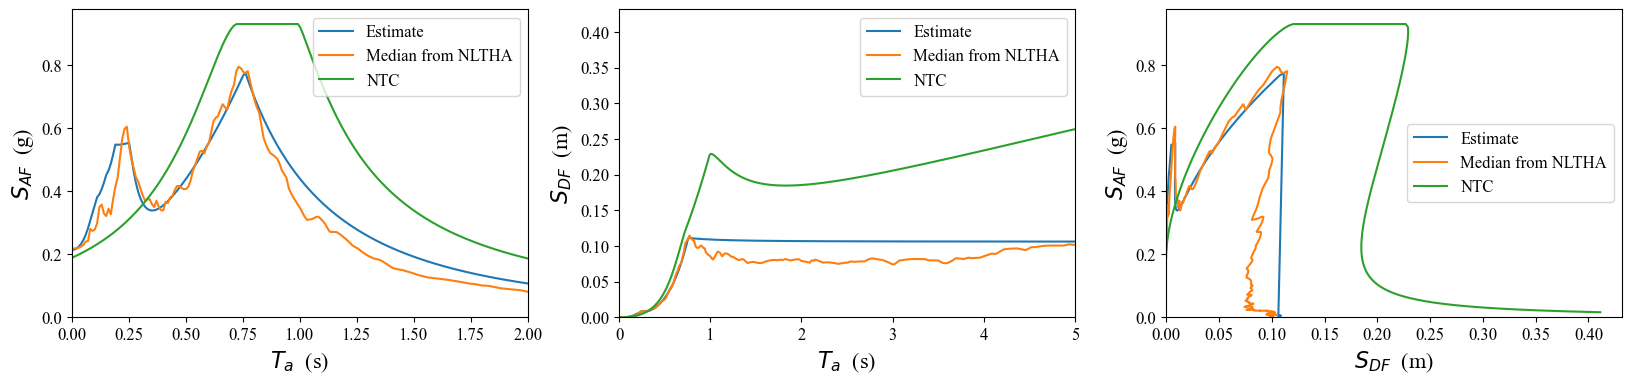

In [108]:
PlotFRS(Saf2,Sdf2,SaF2m,SdF2m,ns,Saf2n,Sdf2n)

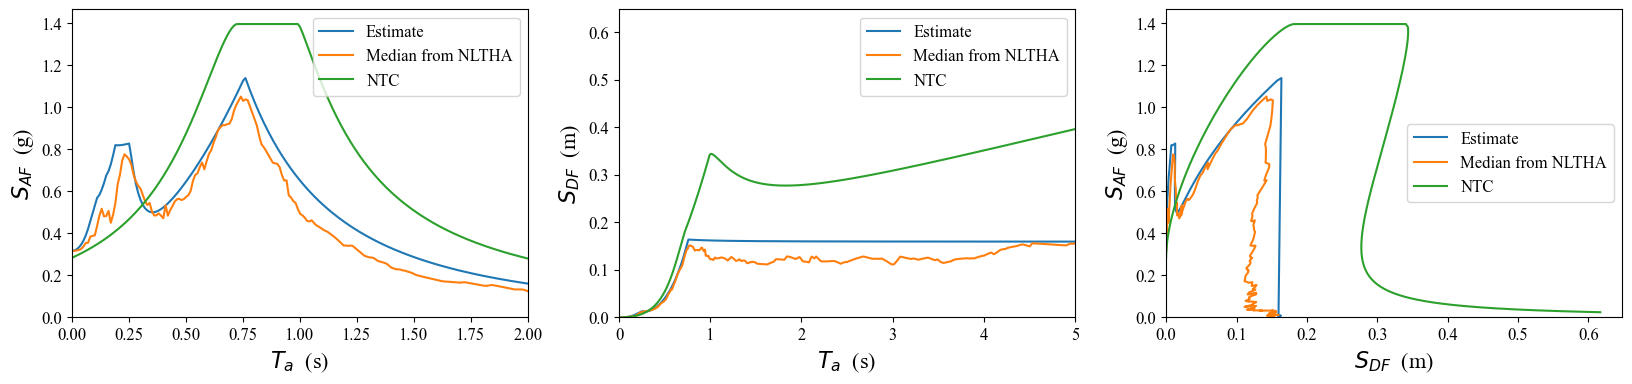

In [109]:
PlotFRS(Saf3,Sdf3,SaF3m,SdF3m,ns,Saf3n,Sdf3n)

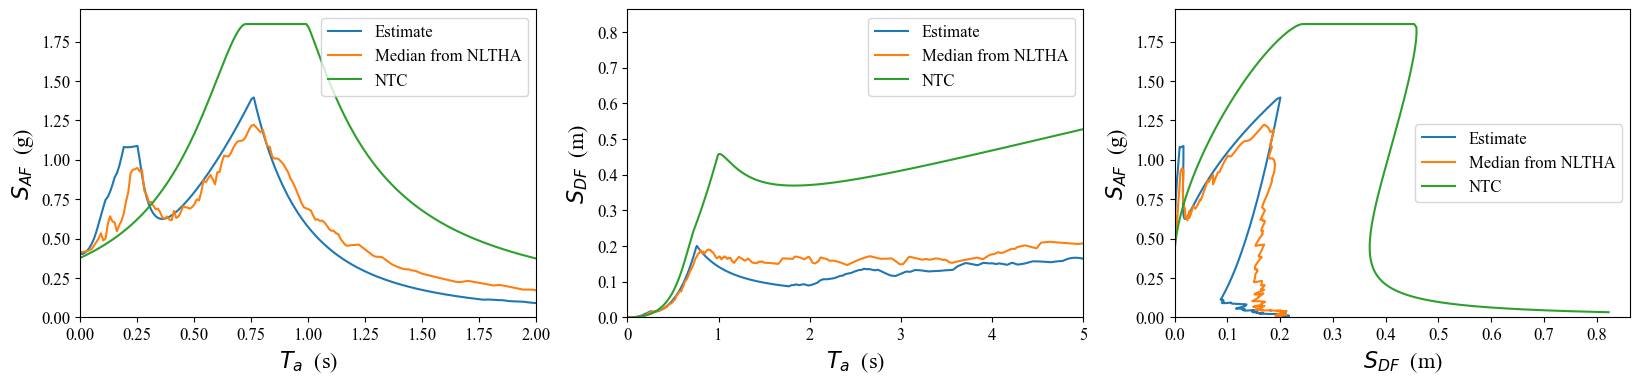

In [110]:
PlotFRS(Saf4,Sdf4,SaF4m,SdF4m,ns,Saf4n,Sdf4n)

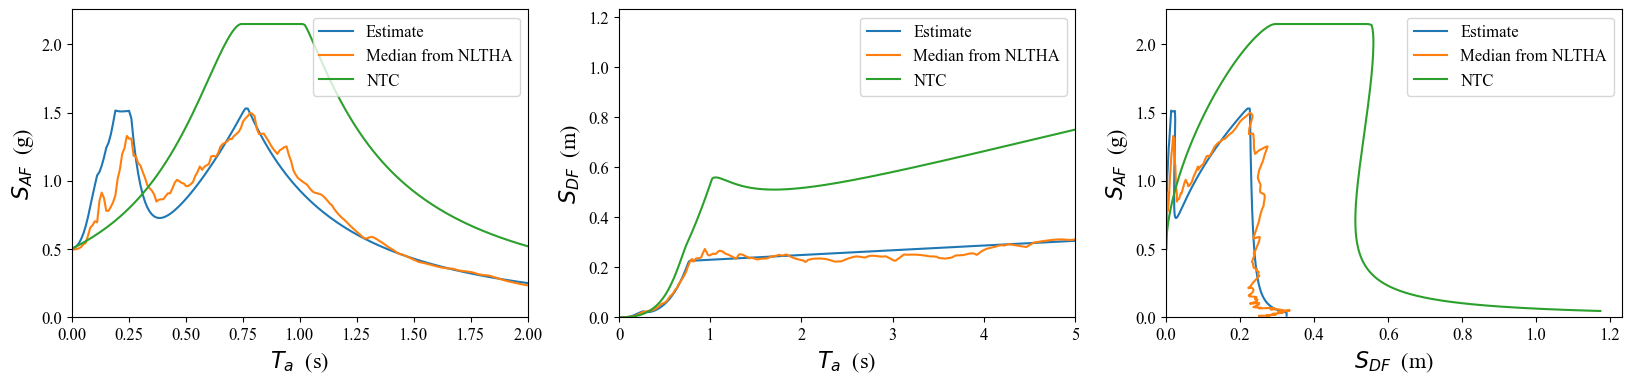

In [111]:
PlotFRS(Saf5,Sdf5,SaF5m,SdF5m,ns,Saf5n,Sdf5n)

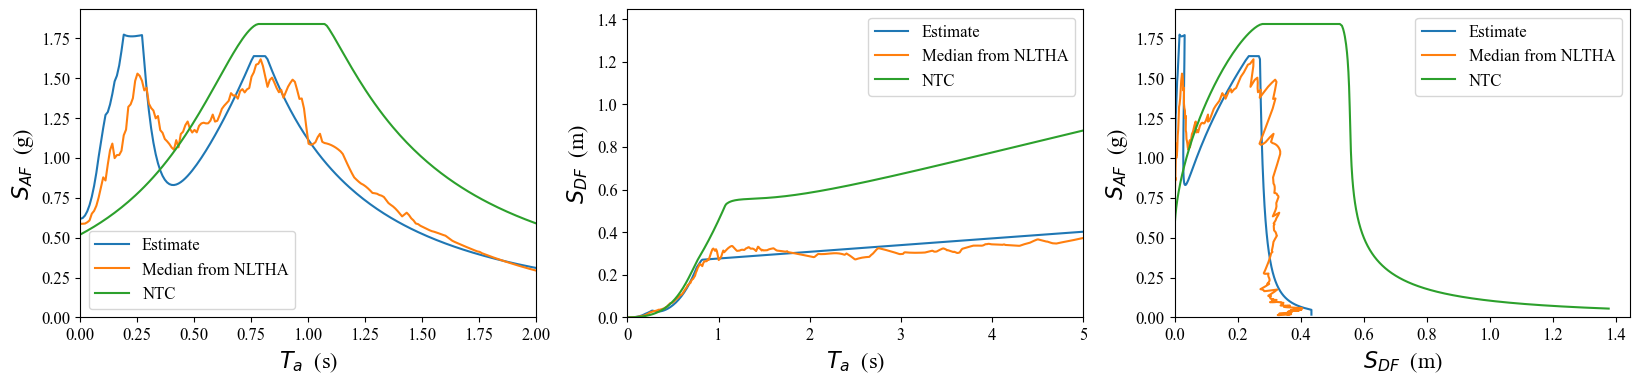

In [112]:
PlotFRS(Saf6,Sdf6,SaF6m,SdF6m,ns,Saf6n,Sdf6n)

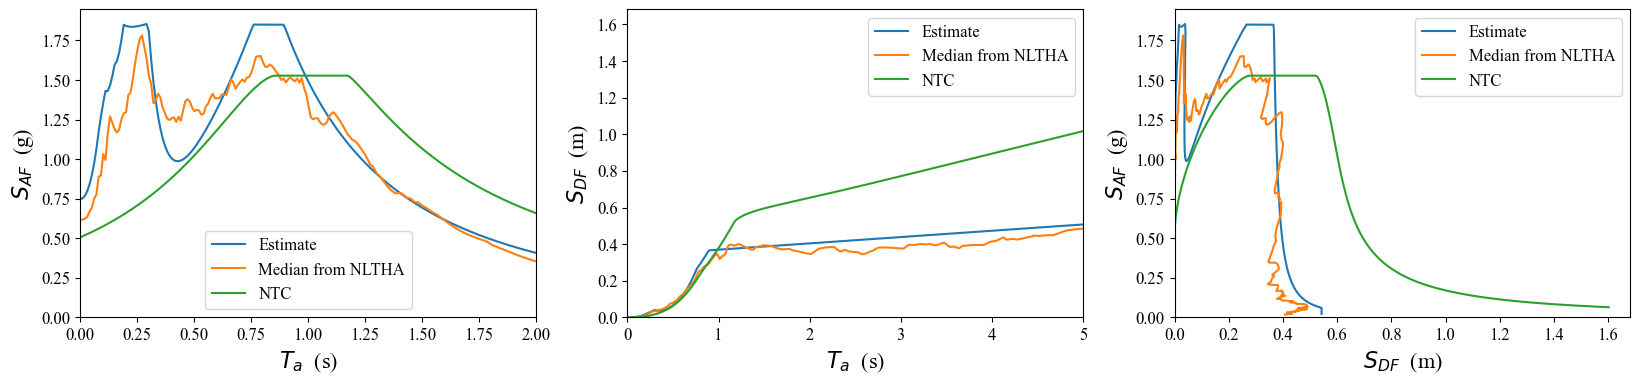

In [113]:
PlotFRS(Saf7,Sdf7,SaF7m,SdF7m,ns,Saf7n,Sdf7n)

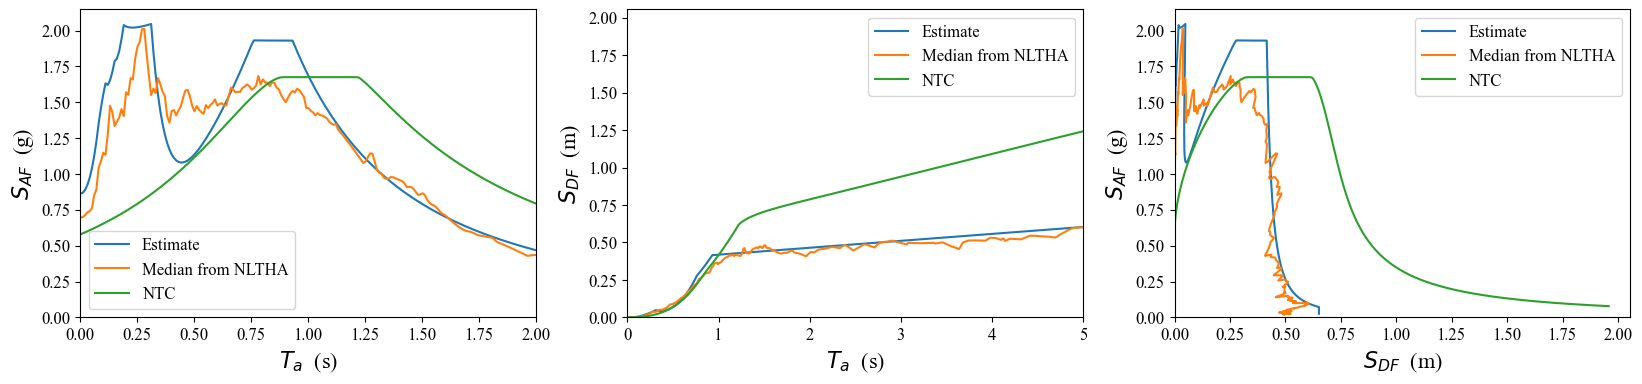

In [114]:
PlotFRS(Saf8,Sdf8,SaF8m,SdF8m,ns,Saf8n,Sdf8n)

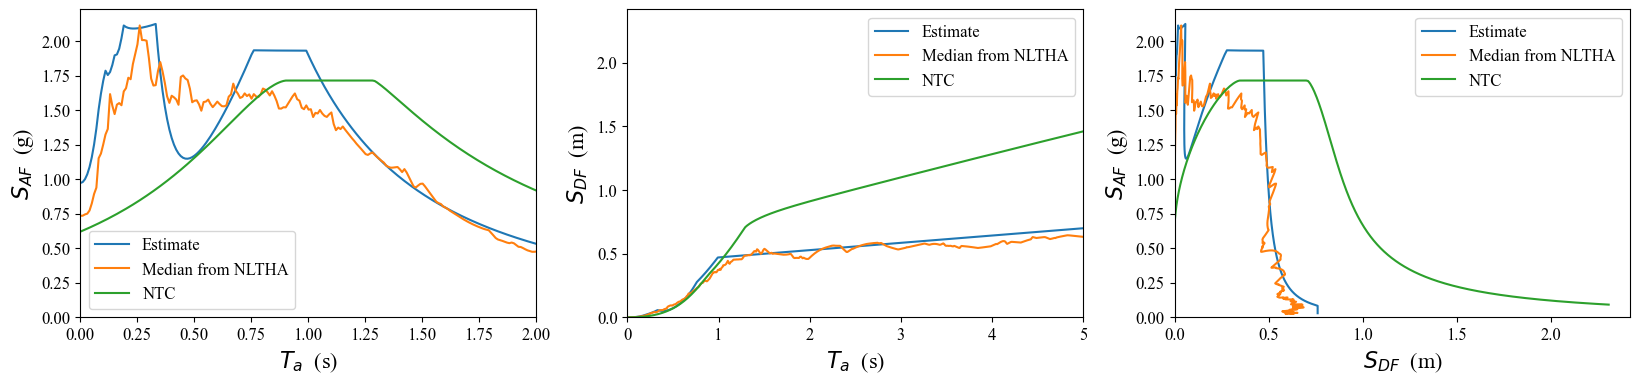

In [115]:
PlotFRS(Saf9,Sdf9,SaF9m,SdF9m,ns,Saf9n,Sdf9n)

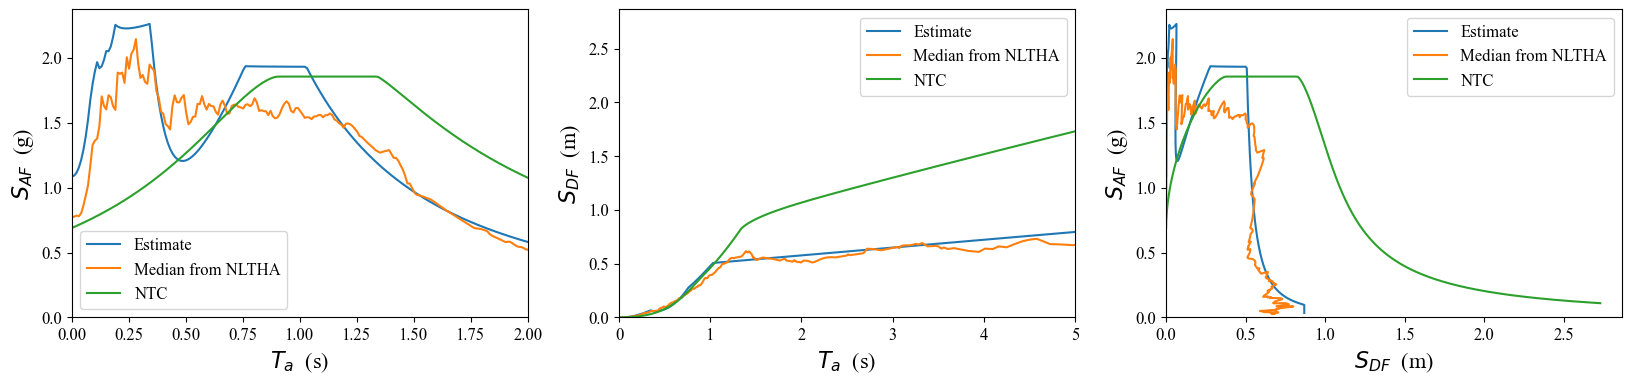

In [116]:
PlotFRS(Saf10,Sdf10,SaF10m,SdF10m,ns,Saf10n,Sdf10n)

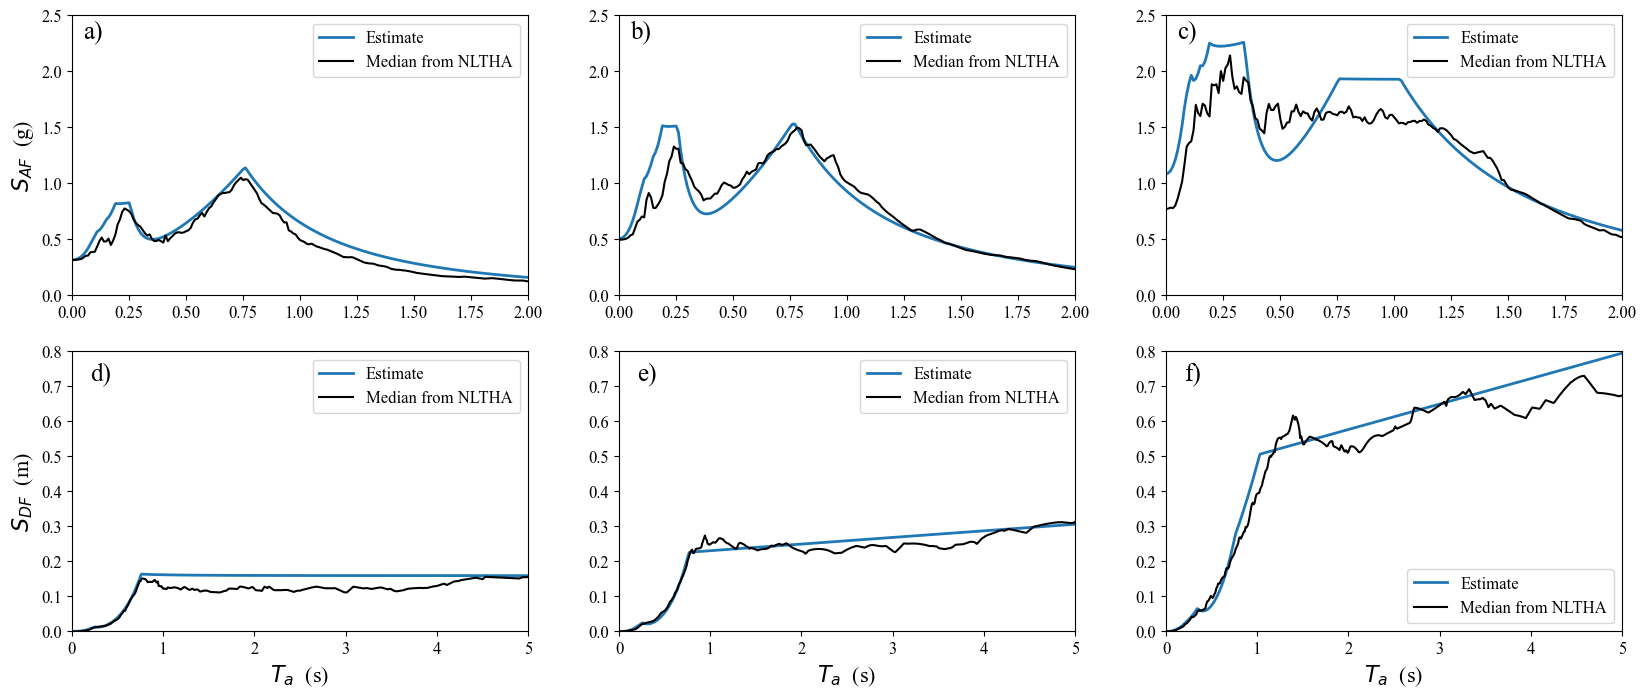

In [171]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
plt.plot(T,Saf3[:,2],label='Estimate',lw=2)
plt.plot(T,SaF3m[:,2],label='Median from NLTHA',color='k')
plt.xlim(0,2)
plt.ylim(0,2.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel(r'$T_a$  (s)',fontsize=16)
plt.ylabel(r'$S_{AF}$  (g)',fontsize=16)
plt.legend(fontsize=12)
plt.text(0.05,2.3,'a)',fontsize=18)

plt.subplot(2,3,2)
plt.plot(T,Saf5[:,2],label='Estimate',lw=2)
plt.plot(T,SaF5m[:,2],label='Median from NLTHA',color='k')
plt.xlim(0,2)
plt.ylim(0,2.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel(r'$T_a$  (s)',fontsize=16)
#plt.ylabel(r'$S_{AF}$  (g)',fontsize=16)
plt.legend(fontsize=12)
plt.text(0.05,2.3,'b)',fontsize=18)


plt.subplot(2,3,3)
plt.plot(T,Saf10[:,2],label='Estimate',lw=2)
plt.plot(T,SaF10m[:,2],label='Median from NLTHA',color='k')
plt.xlim(0,2)
plt.ylim(0,2.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel(r'$T_a$  (s)',fontsize=16)
#plt.ylabel(r'$S_{AF}$  (g)',fontsize=16)
plt.legend(fontsize=12)
plt.text(0.05,2.3,'c)',fontsize=18)


plt.subplot(2,3,4)
plt.plot(T,Sdf3[:,2],label='Estimate',lw=2)
plt.plot(T,SdF3m[:,2],label='Median from NLTHA',color='k')
plt.xlim(0,5)
plt.ylim(0,0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$T_a$  (s)',fontsize=16)
plt.ylabel(r'$S_{DF}$  (m)',fontsize=16)
plt.legend(fontsize=12)
plt.text(0.2,0.72,'d)',fontsize=18)

plt.subplot(2,3,5)
plt.plot(T,Sdf5[:,2],label='Estimate',lw=2)
plt.plot(T,SdF5m[:,2],label='Median from NLTHA',color='k')
plt.xlim(0,5)
plt.ylim(0,0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$T_a$  (s)',fontsize=16)
#plt.ylabel(r'$S_{DF}$  (m)',fontsize=16)
plt.legend(fontsize=12)
plt.text(0.2,0.72,'e)',fontsize=18)


plt.subplot(2,3,6)
plt.plot(T,Sdf10[:,2],label='Estimate',lw=2)
plt.plot(T,SdF10m[:,2],label='Median from NLTHA',color='k')
plt.xlim(0,5)
plt.ylim(0,0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$T_a$  (s)',fontsize=16)
#plt.ylabel(r'$S_{DF}$  (m)',fontsize=16)
plt.legend(fontsize=12,loc=4)
plt.text(0.2,0.72,'f)',fontsize=18)

#plt.tight_layout()
plt.savefig('C:/Users/rmeri/Documents/UCL/FRS/SPONSE6/Figure5.tiff',dpi=300)
plt.show()

In [117]:
def MeanSquaredError(Saf,SaFm,Ty,muB):    
    
    SEa = np.zeros((len(T),3))

    for i in range(3):
        for j in range(10,len(T)):
            SEa[j,i] = abs(Saf[j,i]-SaFm[j,i])/SaFm[j,i]

    MSEa = np.zeros((3,3))

    MSEa[0,0] = (np.mean(SEa[10:abs(0.5*0.84*Ty-T).argmin(),0]))
    MSEa[1,0] = (np.mean(SEa[abs(0.5*0.84*Ty-T).argmin():abs(1.5*0.84*Ty*((1+muB**0.5+muB)/3)**0.5-T).argmin(),0]))
    MSEa[2,0] = (np.mean(SEa[abs(1.5*0.84*Ty*((1+muB**0.5+muB)/3)**0.5-T).argmin():abs(5-T).argmin(),0]))

    MSEa[0,1] = (np.mean(SEa[10:abs(0.5*0.84*Ty-T).argmin(),1]))
    MSEa[1,1] = (np.mean(SEa[abs(0.5*0.84*Ty-T).argmin():abs(1.5*0.84*Ty*((1+muB**0.5+muB)/3)**0.5-T).argmin(),1]))
    MSEa[2,1] = (np.mean(SEa[abs(1.5*0.84*Ty*((1+muB**0.5+muB)/3)**0.5-T).argmin():abs(5-T).argmin(),1]))
    
    MSEa[0,2] = (np.mean(SEa[10:abs(0.5*0.84*Ty-T).argmin(),2]))
    MSEa[1,2] = (np.mean(SEa[abs(0.5*0.84*Ty-T).argmin():abs(1.5*0.84*Ty*((1+muB**0.5+muB)/3)**0.5-T).argmin(),2]))
    MSEa[2,2] = (np.mean(SEa[abs(1.5*0.84*Ty*((1+muB**0.5+muB)/3)**0.5-T).argmin():abs(5-T).argmin(),2]))
    
    return MSEa

In [118]:
MSEa = np.zeros((3,3,len(IMs)))

MSEa[:,:,0] = MeanSquaredError(Saf1,SaF1m,Ty,muB[0])
MSEa[:,:,1] = MeanSquaredError(Saf2,SaF2m,Ty,muB[1])
MSEa[:,:,2] = MeanSquaredError(Saf3,SaF3m,Ty,muB[2])
MSEa[:,:,3] = MeanSquaredError(Saf4,SaF4m,Ty,muB[3])
MSEa[:,:,4] = MeanSquaredError(Saf5,SaF5m,Ty,muB[4])
MSEa[:,:,5] = MeanSquaredError(Saf6,SaF6m,Ty,muB[5])
MSEa[:,:,6] = MeanSquaredError(Saf7,SaF7m,Ty,muB[6])
MSEa[:,:,7] = MeanSquaredError(Saf8,SaF8m,Ty,muB[7])
MSEa[:,:,8] = MeanSquaredError(Saf9,SaF9m,Ty,muB[8])
MSEa[:,:,9] = MeanSquaredError(Saf10,SaF10m,Ty,muB[9])

In [119]:
MSEd = np.zeros((3,3,len(IMs)))

MSEd[:,:,0] = MeanSquaredError(Sdf1,SdF1m,Ty,muB[0])
MSEd[:,:,1] = MeanSquaredError(Sdf2,SdF2m,Ty,muB[1])
MSEd[:,:,2] = MeanSquaredError(Sdf3,SdF3m,Ty,muB[2])
MSEd[:,:,3] = MeanSquaredError(Sdf4,SdF4m,Ty,muB[3])
MSEd[:,:,4] = MeanSquaredError(Sdf5,SdF5m,Ty,muB[4])
MSEd[:,:,5] = MeanSquaredError(Sdf6,SdF6m,Ty,muB[5])
MSEd[:,:,6] = MeanSquaredError(Sdf7,SdF7m,Ty,muB[6])
MSEd[:,:,7] = MeanSquaredError(Sdf8,SdF8m,Ty,muB[7])
MSEd[:,:,8] = MeanSquaredError(Sdf9,SdF9m,Ty,muB[8])
MSEd[:,:,9] = MeanSquaredError(Sdf10,SdF10m,Ty,muB[9])

In [120]:
def MeanSquaredErrorT(Saf,SaFm):    
    
    SEa = np.zeros((len(T),3))
    

    for i in range(3):
        for j in range(10,500):
            SEa[j,i] = abs(Saf[j,i]-SaFm[j,i])/SaFm[j,i]

    MSEa = np.zeros(3)
    for i in range(3):
        MSEa[i] = np.mean(SEa[10:500,i])
        
    return MSEa

In [126]:
MSEta = np.zeros((3,len(IMs)))

MSEta[:,0] = MeanSquaredErrorT(Saf1,SaF1m)
MSEta[:,1] = MeanSquaredErrorT(Saf2,SaF2m)
MSEta[:,2] = MeanSquaredErrorT(Saf3,SaF3m)
MSEta[:,3] = MeanSquaredErrorT(Saf4,SaF4m)
MSEta[:,4] = MeanSquaredErrorT(Saf5,SaF5m)
MSEta[:,5] = MeanSquaredErrorT(Saf6,SaF6m)
MSEta[:,6] = MeanSquaredErrorT(Saf7,SaF7m)
MSEta[:,7] = MeanSquaredErrorT(Saf8,SaF8m)
MSEta[:,8] = MeanSquaredErrorT(Saf9,SaF9m)
MSEta[:,9] = MeanSquaredErrorT(Saf10,SaF10m)

In [127]:
MSEtd = np.zeros((3,len(IMs)))

MSEtd[:,0] = MeanSquaredErrorT(Sdf1,SdF1m)
MSEtd[:,1] = MeanSquaredErrorT(Sdf2,SdF2m)
MSEtd[:,2] = MeanSquaredErrorT(Sdf3,SdF3m)
MSEtd[:,3] = MeanSquaredErrorT(Sdf4,SdF4m)
MSEtd[:,4] = MeanSquaredErrorT(Sdf5,SdF5m)
MSEtd[:,5] = MeanSquaredErrorT(Sdf6,SdF6m)
MSEtd[:,6] = MeanSquaredErrorT(Sdf7,SdF7m)
MSEtd[:,7] = MeanSquaredErrorT(Sdf8,SdF8m)
MSEtd[:,8] = MeanSquaredErrorT(Sdf9,SdF9m)
MSEtd[:,9] = MeanSquaredErrorT(Sdf10,SdF10m)

In [128]:
MSEtan = np.zeros((3,len(IMs)))

MSEtan[:,0] = MeanSquaredErrorT(Saf1n,SaF1m)
MSEtan[:,1] = MeanSquaredErrorT(Saf2n,SaF2m)
MSEtan[:,2] = MeanSquaredErrorT(Saf3n,SaF3m)
MSEtan[:,3] = MeanSquaredErrorT(Saf4n,SaF4m)
MSEtan[:,4] = MeanSquaredErrorT(Saf5n,SaF5m)
MSEtan[:,5] = MeanSquaredErrorT(Saf6n,SaF6m)
MSEtan[:,6] = MeanSquaredErrorT(Saf7n,SaF7m)
MSEtan[:,7] = MeanSquaredErrorT(Saf8n,SaF8m)
MSEtan[:,8] = MeanSquaredErrorT(Saf9n,SaF9m)
MSEtan[:,9] = MeanSquaredErrorT(Saf10n,SaF10m)

In [129]:
MSEtdn = np.zeros((3,len(IMs)))

MSEtdn[:,0] = MeanSquaredErrorT(Sdf1n,SdF1m)
MSEtdn[:,1] = MeanSquaredErrorT(Sdf2n,SdF2m)
MSEtdn[:,2] = MeanSquaredErrorT(Sdf3n,SdF3m)
MSEtdn[:,3] = MeanSquaredErrorT(Sdf4n,SdF4m)
MSEtdn[:,4] = MeanSquaredErrorT(Sdf5n,SdF5m)
MSEtdn[:,5] = MeanSquaredErrorT(Sdf6n,SdF6m)
MSEtdn[:,6] = MeanSquaredErrorT(Sdf7n,SdF7m)
MSEtdn[:,7] = MeanSquaredErrorT(Sdf8n,SdF8m)
MSEtdn[:,8] = MeanSquaredErrorT(Sdf9n,SdF9m)
MSEtdn[:,9] = MeanSquaredErrorT(Sdf10n,SdF10m)

In [143]:
n = 2

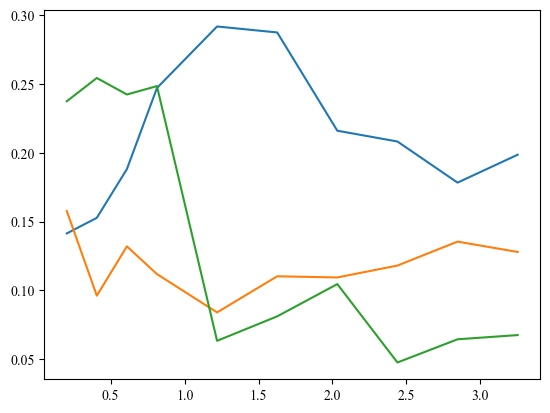

In [144]:
plt.plot(Rm,MSEa[0,n,:])
plt.plot(Rm,MSEa[1,n,:])
plt.plot(Rm,MSEa[2,n,:])
plt.show()
#plt.ylim(0,2)

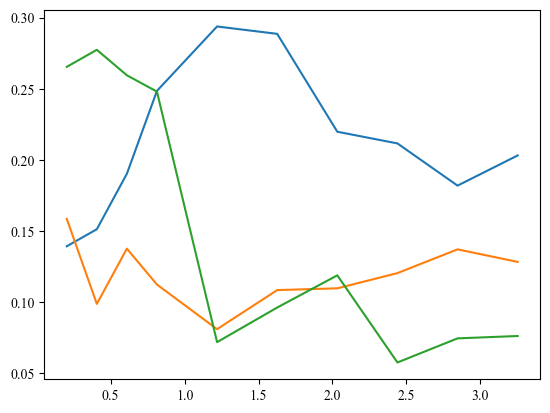

In [145]:
plt.plot(Rm,MSEd[0,n,:])
plt.plot(Rm,MSEd[1,n,:])
plt.plot(Rm,MSEd[2,n,:])
plt.show()
#plt.ylim(0,0.1)

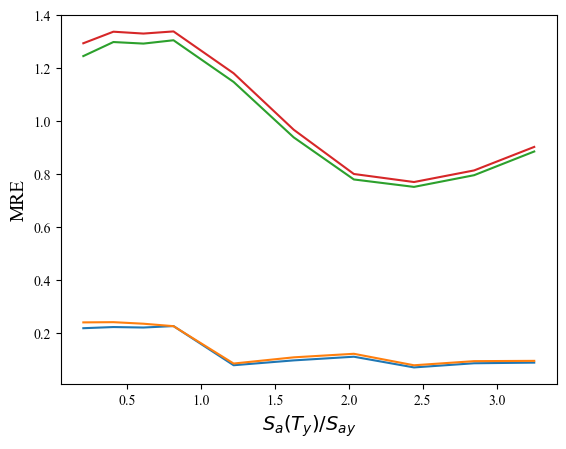

In [146]:
plt.plot(Rm,MSEta[n,:])
plt.plot(Rm,MSEtd[n,:])

plt.plot(Rm,MSEtan[n,:])
plt.plot(Rm,MSEtdn[n,:])
plt.xlabel(r'$S_{a}(T_y)/S_{ay}$',fontsize=14)
plt.ylabel(r'MRE',fontsize=14)

plt.show()

In [136]:
nst = [1,3,6]
for k in range(3):
    for j in range(3):
        with open('./MSE/s1BS6storey/Acceleration/MSE_TR'+str(k+1)+'_S'+str(nst[j])+'.txt','w') as f:
            for i in range(len(IMs)):
                f.write(str(MSEa[k,j,i])+'\n')

In [137]:
for k in range(3):
    for j in range(3):
        with open('./MSE/s1BS6storey/Displacement/MSE_TR'+str(k+1)+'_S'+str(nst[j])+'.txt','w') as f:
            for i in range(len(IMs)):
                f.write(str(MSEd[k,j,i])+'\n')

In [138]:
for j in range(3):
    with open('./MSE/s1BS6storey/Acceleration/MSE_S'+str(nst[j])+'.txt','w') as f:
        for i in range(len(IMs)):
            f.write(str(MSEta[j,i])+'\n')

In [139]:
for j in range(3):
    with open('./MSE/s1BS6storey/Displacement/MSE_S'+str(nst[j])+'.txt','w') as f:
        for i in range(len(IMs)):
            f.write(str(MSEtd[j,i])+'\n')

In [140]:
with open('./MSE/s1BS6storey/Rm.txt','w') as f:
    for i in range(len(Rm)):
        f.write(str(Rm[i])+'\n')